Name: Vitoria Tai

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [94]:
import pandas as pd
import numpy as np 
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns 

#logistic regression models 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import  metrics

## Get the Data
**Read in the advertising.csv file and load it to a data frame called ad_data.**
The dATA PATH:
https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv

In [95]:
ad_data = pd.read_csv('https://raw.githubusercontent.com/niteen11/cuny_lagcc_micro_credential_data_analytics/main/Track%20A/Unit%204%20-%20Machine%20Learning%20and%20Modeling%20Techniques/Dataset/advertising.csv')

**Check the head of ad_data**

In [96]:
ad_data.head()

Daily Time Spent on Site  Age  ...            Timestamp  Clicked on Ad
0                     68.95   35  ...  2016-03-27 00:53:11              0
1                     80.23   31  ...  2016-04-04 01:39:02              0
2                     69.47   26  ...  2016-03-13 20:35:42              0
3                     74.15   29  ...  2016-01-10 02:31:19              0
4                     68.37   35  ...  2016-06-03 03:36:18              0

[5 rows x 10 columns]

** Use info and describe() on ad_data**

In [97]:
#info
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [98]:
ad_data.describe()

Daily Time Spent on Site          Age  ...         Male  Clicked on Ad
count               1000.000000  1000.000000  ...  1000.000000     1000.00000
mean                  65.000200    36.009000  ...     0.481000        0.50000
std                   15.853615     8.785562  ...     0.499889        0.50025
min                   32.600000    19.000000  ...     0.000000        0.00000
25%                   51.360000    29.000000  ...     0.000000        0.00000
50%                   68.215000    35.000000  ...     0.000000        0.50000
75%                   78.547500    42.000000  ...     1.000000        1.00000
max                   91.430000    61.000000  ...     1.000000        1.00000

[8 rows x 6 columns]

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

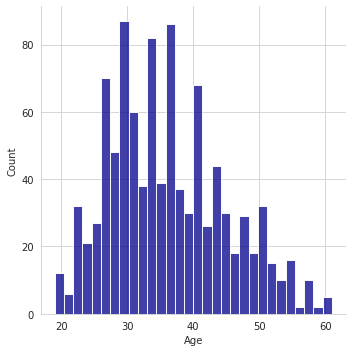

In [99]:
sns.set_style('whitegrid')
sns.displot(ad_data['Age'].dropna(), kde = False, color = 'darkblue', bins = 30)

**Create a jointplot showing Area Income versus Age.**

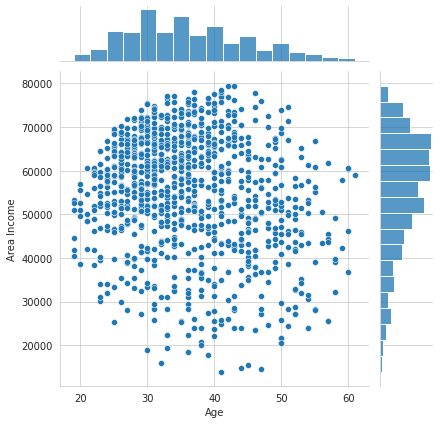

In [100]:
sns.set_style('whitegrid')
sns.jointplot(x = 'Age', y = 'Area Income', data = ad_data)
plt.show()

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

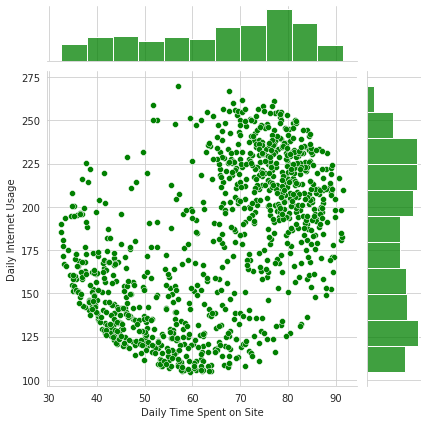

In [101]:
sns.set_style('whitegrid')
sns.jointplot(x = 'Daily Time Spent on Site', y = 'Daily Internet Usage', color = 'green', data = ad_data)
plt.show()

# Logistic Regression

Now it's time to do a train test split, and train the model.

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [102]:
#create new variable for the data set that we will spilit,let say ds=
ds = ad_data

In [103]:
#configuring inputs and dependable variable
#Let have values from our colums as input ,call it X (usually we designate the input as capital X)
#X=ds ['Daily Time Spent on Site','ccccc',](all colums are going to be as an input )
#y=ds [name of dependent variable as an out put,Let say, 'Clicked on Ad']
y = ds['Clicked on Ad']
X = ds[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

In [104]:
# we spilit the date for train and test
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [105]:
#fitting the data so it looks normalize 
#to transform the data such that its distribution to have a mean value 0 and std of 1
#each value in the dataset will have the mean value subtracted, 
#and then divided by the standard deviation of the whole dataset
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

** Train and fit a logistic regression model on the training set.**

In [106]:
logModel = LogisticRegression()

In [107]:
logModel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [108]:
predict = logModel.predict(X_test)

** Create a classification report for the model.**

In [109]:
print(classification_report(y_test, predict))
#precision: how many are correctly classified among that class 
#recall: how many of this class you find, over the whole number of element of this class 
#f1-score: avg between precisiona and recall
#support: number of occurrences of the given class in the dataset 

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       136
           1       0.99      0.96      0.98       114

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



In [110]:
print(confusion_matrix(y_test, predict))

[[135   1]
 [  4 110]]


Text(0.5, 15.0, 'Predicted label')

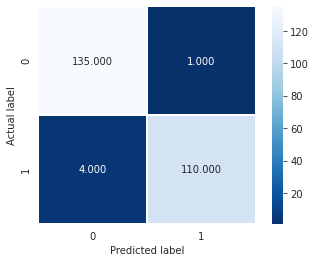

In [111]:
sns.heatmap(confusion_matrix(y_test, predict), annot = True, fmt = '.3f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

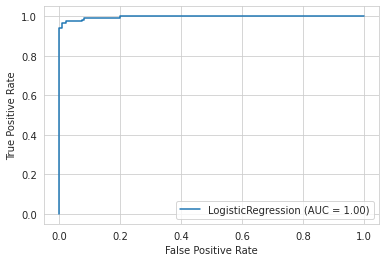

In [113]:
metrics.plot_roc_curve(logModel, X_test, y_test)

# Conclusion:
1. The age group that is on the internet for a long time are people in their 20s, 30s, and 40s.
 
2. Daily time spent on the internet is over 70.
 
3. The prediction for this data is 0.99 correct. 

4. People who spent more time in the internet has a highr income.

5. Income of higher than $40,000 falls into the age group of 20s to 40s. 

